<a href="https://colab.research.google.com/github/mtuntang/Market-Pulse-AI/blob/main/MarketPulse_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home
<div class="markdown-google-sans">
  <h1>MarketPulse AI</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore MarketPulse AI</h2>

---

  <p>A Notebook application that combines stock price data and recent news analysis for selected companies. It pulls real-time financial data from Tiingo and relevant stock-specific news from Finnhub, then uses an LLM (OpenAI API) to provide concise summaries and sentiment analysis.
  </p>
</div>


# Step 1: Notebook Setup and Imports







In [68]:
# Install required libraries if not already installed
!pip install openai
!pip install --upgrade openai
!pip install python-dotenv


# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dotenv import load_dotenv
import os


# Step 2: Configuration


In [78]:
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv()

# Retrieve API keys from environment variables
# API Keys - You can also replace these with your own keys
TIINGO_API_KEY = 'placeholder_key'
FINNHUB_API_KEY = 'placeholder_key'

# Step 3: Data Fetching Functions

<div class="markdown-google-sans">

---

  </n>
  <p>In this step, we’ll create functions to:</p>
  <ol>
    <li>
      Retrieve stock data from Alpha Vantage.
    </li>
    <li>
      Fetch recent news articles from Finnhub related to a specific stock symbol.
    </li>
  </ol>
  

</div>







<strong>Function to Fetch Stock Data</strong>
<p>This function will use Tiingo to get the latest stock data for a given symbol.</p>





In [79]:
# Function to fetch the past year of stock data from Tiingo
def get_stock_data_tiingo(symbol):
    try:
        end_date = datetime.now().strftime("%Y-%m-%d")
        start_date = (datetime.now() - timedelta(days=30)).strftime("%Y-%m-%d")
        url = f"https://api.tiingo.com/tiingo/daily/{symbol}/prices?startDate={start_date}&endDate={end_date}&token={TIINGO_API_KEY}"

        response = requests.get(url)
        data = response.json()

        if response.status_code == 200 and data:
            # Convert JSON response to DataFrame
            df = pd.DataFrame(data)
            df['date'] = pd.to_datetime(df['date'])
            df.set_index('date', inplace=True)
            print("Data fetched!")
            return df
        else:
            print(f"Error fetching stock data for {symbol}: {data.get('message', 'Unknown error')}")
            return None
    except Exception as e:
        print(f"Error fetching stock data for {symbol}: {data.get('message', 'Unknown error')}")
        return None

stock_symbol = input("Enter the stock ticker symbol (e.g., AAPL for Apple): ").upper()

# Fetch stock data from Tiingo
stock_data = get_stock_data_tiingo(stock_symbol)

Enter the stock ticker symbol (e.g., AAPL for Apple): LMT
Data fetched!


<p>Plotting the chart:</p>

                            close      high       low    open   volume  \
date                                                                     
2024-10-07 00:00:00+00:00  605.54  611.5900  604.0000  607.00  1102382   
2024-10-08 00:00:00+00:00  608.05  610.7499  603.0900  607.22   571794   
2024-10-09 00:00:00+00:00  605.11  607.1400  603.0200  606.71   543837   
2024-10-10 00:00:00+00:00  597.49  607.2900  596.2200  606.11   853770   
2024-10-11 00:00:00+00:00  604.17  604.5500  600.0871  600.58   526025   
2024-10-14 00:00:00+00:00  610.87  611.9900  603.7752  606.00   562291   
2024-10-15 00:00:00+00:00  605.00  614.6200  603.7200  612.50   849839   
2024-10-16 00:00:00+00:00  612.83  613.0100  602.6200  603.00   549404   
2024-10-17 00:00:00+00:00  609.62  614.4799  607.2400  612.83   617493   
2024-10-18 00:00:00+00:00  611.81  613.3699  608.4900  611.39   864086   
2024-10-21 00:00:00+00:00  614.61  618.9500  611.3600  615.64  1017480   
2024-10-22 00:00:00+00:00  576.98  608

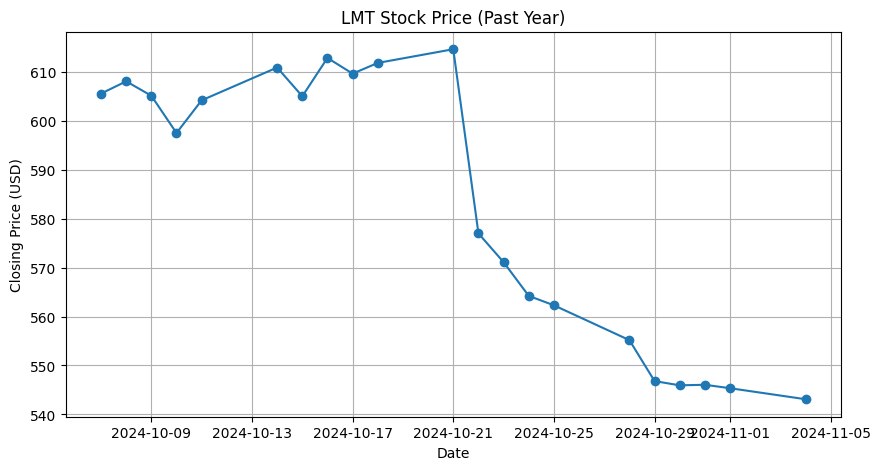

In [80]:
# Function to plot stock data
def plot_stock_data(df, symbol):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['close'], marker='o', linestyle='-')
    plt.title(f'{symbol} Stock Price (Past Year)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.show()

if stock_data is not None:
    print(stock_data)
    plot_stock_data(stock_data, stock_symbol)

<strong>Function to Fetch Stock News</strong>
<p>This function will use Finnhub to get the latest stock data for a given symbol.</p>


In [81]:
# Function to fetch recent news articles from Finnhub
def get_news_articles_finnhub(symbol):
    try:
        end_date = datetime.now().strftime("%Y-%m-%d")
        start_date = (datetime.now() - timedelta(days=30)).strftime("%Y-%m-%d")
        url = f'https://finnhub.io/api/v1/company-news?symbol={symbol}&from={start_date}&to={end_date}&token={FINNHUB_API_KEY}'
        print(url)
        response = requests.get(url)
        articles = response.json()
        return articles
    except Exception as e:
        print(f"Exception occurred: {e}")
        return []

print(stock_symbol)
news_articles = get_news_articles_finnhub(stock_symbol)
if news_articles:
    print(f"\nRecent News Articles for {stock_symbol}:\n")
    for article in news_articles[:5]:  # Show only the first 5 articles
        print(f"Title: {article['headline']}")
        print(f"Date: {article['datetime']}")
        print(f"Source: {article['source']}")
        print(f"URL: {article['url']}\n")
else:
    print("No recent news articles found.")

LMT
https://finnhub.io/api/v1/company-news?symbol=LMT&from=2024-10-06&to=2024-11-05&token=cskg0t1r01qn1f3vkhj0cskg0t1r01qn1f3vkhjg

Recent News Articles for LMT:

Title: Drones In Defense: Reshaping Modern Warfare And Its Economics
Date: 1730801400
Source: SeekingAlpha
URL: https://finnhub.io/api/news?id=2c44f94a95013ee2f3b486cedb98462d59a85e7262a440593bc7dbc185c59462

Title: Marshall Named First Lockheed Martin-Approved Center of Excellence for C-130 Hercules Center Wing Box Replacements
Date: 1730795925
Source: Finnhub
URL: https://finnhub.io/api/news?id=e9cd5ea381ec02b0d1c1897bf040fb8b4fb48ebb55878c3e1f6efab82dae74ee

Title: Lockheed Martin: Patriot missile proves its worth
Date: 1730787382
Source: Finnhub
URL: https://finnhub.io/api/news?id=bd74f378512b34fad9bb67dc350b8021ef499cad11ec0fc068a93e970a2ac7e4

Title: Lockheed Martin Corporation (LMT): Among the Best American Defense Stocks To Buy According to Hedge Funds
Date: 1730768613
Source: Yahoo
URL: https://finnhub.io/api/news?id

# Step 4: LLM Integration with OpenAI API

<div class="markdown-google-sans">

---

  </n>
  <p>In this step, we will:</p>
  <ol>
    <li>
      Setup the OpenAI API client.
    </li>
    <li>
      Fetch the summary of our stock price and news data to get sentiment analysis from ChatGPT
    </li>
  </ol>

</div>






In [82]:
from openai import OpenAI

client = OpenAI(
  api_key='placeholder_key',
)



# Function to perform sentiment analysis and summarization using OpenAI API
def analyze_sentiment_with_openai(article_text):
    try:
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": f"Analyze the sentiment of this article and summarize it: {article_text}",
                }
            ],
            model="gpt-3.5-turbo",
        )
        sentiment_summary = chat_completion.choices[0].message.content.replace(". ", ".\n")
        return sentiment_summary
    except Exception as e:
        print("Error with OpenAI API:", e)
        return None

# Initialize a list to hold the formatted summaries for each article
sentiment_summary_list = []

for article in news_articles[:5]:  # Limit to first 5 articles for brevity
    # Convert timestamp to readable date format
    readable_date = datetime.utcfromtimestamp(article['datetime']).strftime('%Y-%m-%d %H:%M:%S')

    # Perform sentiment analysis and summarize with OpenAI
    sentiment_summary = analyze_sentiment_with_openai(article['summary'])
    formatted_summary = sentiment_summary.replace('. ', '.\n') if sentiment_summary else 'No summary available'


    # Define the parts separately
    title = f"Title: {article['headline']}\n"
    date = f"Date: {readable_date}\n"
    source = f"Source: {article['source']}\n"
    url = f"URL: {article['url']}\n"
    sentiment_summary_text = f"Sentiment Summary:\n {formatted_summary}"
    separator = '-' * 40 + '\n'

    # Combine all parts into one string
    article_summary = title + date + source + url + sentiment_summary_text + separator

    # Append the formatted string to the list
    sentiment_summary_list.append(article_summary)

# Combine all article summaries into a single string
news_summary = "\n".join(sentiment_summary_list)

# Print or use the full summary string as needed
print(news_summary)



Title: Drones In Defense: Reshaping Modern Warfare And Its Economics
Date: 2024-11-05 10:10:00
Source: SeekingAlpha
URL: https://finnhub.io/api/news?id=2c44f94a95013ee2f3b486cedb98462d59a85e7262a440593bc7dbc185c59462
Sentiment Summary:
 The sentiment of this article is neutral, focusing on the impact of drones on military conflicts.
The main point is that drones have made warfare more accessible and affordable for less financially resourced forces, allowing them to compete with larger and wealthier militaries.
This shift in power dynamics has implications for how conflicts are fought and won in the modern world.----------------------------------------

Title: Marshall Named First Lockheed Martin-Approved Center of Excellence for C-130 Hercules Center Wing Box Replacements
Date: 2024-11-05 08:38:45
Source: Finnhub
URL: https://finnhub.io/api/news?id=e9cd5ea381ec02b0d1c1897bf040fb8b4fb48ebb55878c3e1f6efab82dae74ee
Sentiment Summary:
 The sentiment of this article is positive and celebrat

<p>Now combining stock price data with the sentiment analysis:</p>

In [84]:
def summarize_insights(stock_data, news_summary):
    try:
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": f"Give a short summary in bullet points for {stock_symbol}, given {stock_data} and {news_summary}",
                }
            ],
            model="gpt-3.5-turbo",
        )
        summary_insight = chat_completion.choices[0].message.content.replace(". ", ".\n")
        return summary_insight
    except Exception as e:
        print("Error with OpenAI API:", e)
        return None

print(summarize_insights(stock_data, news_summary))

- Lockheed Martin's stock prices fluctuated between $545.35 and $612.83 in late October and early November 2024
- The company was recognized as the world's first authorized center of excellence for C-130 Hercules center wing box replacements
- Positive news surrounding Lockheed Martin's successful integration of Patriot missile with Raytheon's LTAMDS radar 
- Lockheed Martin highlighted as one of the best American defense stocks to buy, with a positive outlook due to potential increased defense spending
- Collaboration between Lockheed Martin and Meta to develop large language models for national security applications
